<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [1]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

from scipy.stats import bernoulli, beta 

In [2]:
# datos
data = pd.read_csv('data/cookie_cats.csv')
data

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [3]:
data['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [4]:
# transformacion
data.groupby(['version','retention_1']).size()



version  retention_1
gate_30  False          24666
         True           20034
gate_40  False          25370
         True           20119
dtype: int64

In [18]:
# testeo para retention_1
imps_ctrl, convs_ctrl = 44700, 20034    # entrar, comprar

imps_test, convs_test = 45489,  20119

CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

f'Tasas conversion: Control: {CR_ctrl}, Test: {CR_test}'

'Tasas conversion: Control: 0.4481879194630872, Test: 0.44228274967574577'

In [19]:
# a prioris

a_C, b_C = 1+convs_ctrl, 1+imps_ctrl-convs_ctrl

a_T, b_T = 1+convs_test, 1+imps_test-convs_test


beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

beta_control.mean(), beta_test.mean()

(0.44819023757326293, 0.44228528719966587)

In [20]:
x=np.linspace(0.42,0.48, 100)
def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.2f} $\pm$ {:.4f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

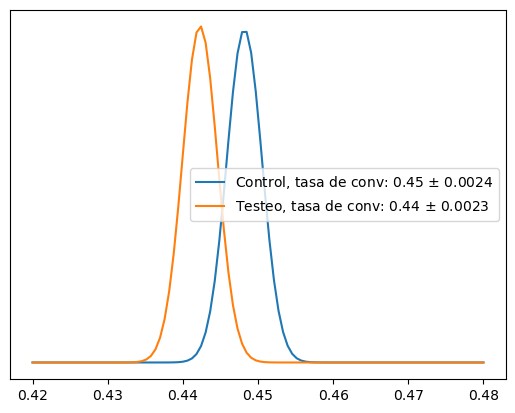

In [21]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [22]:
# testeo para retention_7

data.groupby(['version','retention_7']).size()

version  retention_7
gate_30  False          36198
         True            8502
gate_40  False          37210
         True            8279
dtype: int64

In [23]:
imps_ctrl7, convs_ctrl7 = 44700, 8502    # entrar, comprar

imps_test7, convs_test7 = 45489, 8279 

CR_ctrl = convs_ctrl7/imps_ctrl7
CR_test = convs_test7/imps_test7

f'Tasas conversion: Control: {CR_ctrl}, Test: {CR_test}'

'Tasas conversion: Control: 0.19020134228187918, Test: 0.18200004396667327'

In [24]:
a_C7, b_C7 = 1+convs_ctrl7, 1+imps_ctrl7-convs_ctrl7

a_T7, b_T7 = 1+convs_test7, 1+imps_test7-convs_test7


beta_control7 = beta(a_C7, b_C7)

beta_test7 = beta(a_T7, b_T7)

beta_control7.mean(), beta_test7.mean()

(0.19021520289919913, 0.18201402475214878)

In [25]:
x=np.linspace(0.172,0.2, 100)
def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.2f} $\pm$ {:.4f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

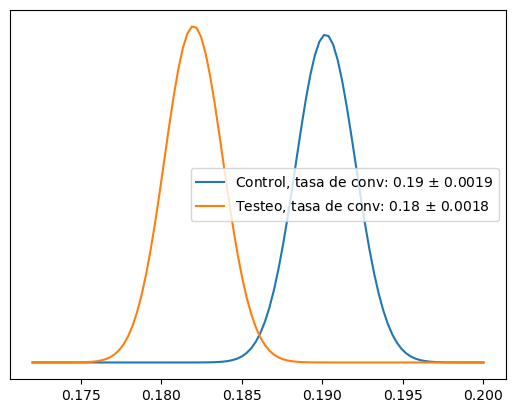

In [26]:
plot([beta_control7, beta_test7], ['Control', 'Testeo'])

In [30]:
salto = (beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

-0.013175098158249857

In [31]:
salto = (beta_test7.mean() - beta_control7.mean())/beta_control7.mean()

salto

-0.04311526114658881

In [27]:
#probabilidades
import bayes
# retention_1
bayes.calc_prob(beta_control, beta_test)


0.9627939748515354

In [28]:
# retention_7
bayes.calc_prob(beta_control7,beta_test7)

0.9992226613235504

In [33]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.
#En base a los resultados obtenidos, podemos ver que en retention1 el test reduce la tasa de conversion en 1.31% con una probabilidad de 96%
# Mientras que en retention7 el test reduce la tasa de conversion en 4.31% con una probabilidad de 99%